- 평점 데이터 내의 사용자 정보를 기준으로 정보를 취합하고 현황을 파악한다.
- 사용자 별로 몇편의 영화에 평점을 부여했는지 분포를 파악하라(histogram)
- 사용자의 활동 패턴(활동 기간, 평점 주기 패턴)을 탐색하라(linear chart)
- 사용자의 선호 장르를 파악할 수 있게 시각화 하라(heatmap)

### 수행 방법
- 결측치를 파악후 제거 또는 채운다.
- 사용자 별로 value_count해 분포를 확인후 histogram으로 그린다.
- date column을 추가 후 가로축을 시간, 세로축을 평점으로 한 lienar chat를 그린다.
- bar chart, histogram, linear chart, heatmap을 그리는 방법을 파악하고 함수화 한다.

In [41]:
# module
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np

In [42]:
# Util Functions
from enum import Enum

# 파일을 읽어와 pandas의 DataFrame으로 반환해줌
def get_df_from(path: str, sep: str = ','):
    extension = path.split('.')[-1]
    try:
        if extension == "csv" or extension == "txt":
            df = pd.read_csv(path, sep=sep, on_bad_lines='skip')
            if df.empty:
                print("W: DataFrame is empty.")
                return None
            return df
        else:
            print("E: File extension is not supported.")
            return None
    except FileNotFoundError:
        print(f"E: File not found. Check the path: {path}")
        return None
    except pd.errors.ParserError as e:
        print(f"E: Error parsing CSV file: {e}")
    except Exception as e:
        print(f"E: An unexpected error occured: {e}")

# 리스트의 평균을 반환.(기본값 0)
def calculate_mean(lst):
    if lst: # 빈 리스트가 아닌 경우에만 평균 계산
        return np.mean(lst)
    return 0 # 빈 리스트인 경우 NaN 반환

# 리스트의 합을 반환.(기본값 0)
def calculate_sum(lst):
    if lst:
        return np.sum(lst)
    return 0


class ChartShape(Enum):
    BAR = 1
    HISTOGRAM = 2
    LINEAR = 3
    HEATMAP = 4

# Chart 뽑는 함수
def get_chart_from(df: pd.DataFrame, x_col: str, y_col: str, shape: ChartShape = ChartShape.BAR, real_time: bool = False):
    plt.figure(figsize=(10, 6))
    if shape == ChartShape.BAR:
        plt.bar(df[x_col], df[y_col])
    elif shape == ChartShape.HISTOGRAM:
        plt.hist(df[x_col], bins=10)
    elif shape == ChartShape.LINEAR:
        plt.plot(df[x_col], df[y_col])
    else:
        plt.plot(df[x_col], df[y_col])

    if real_time:
        plt.gca().xaxis.set_major_locator(mdates.MonthLocator()) # 월 단위로 큰 눈금 표시
        plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d')) # 날짜 형식 지정
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.grid(True)
    plt.tight_layout()
    plt.xticks(df[x_col], rotation=45, ha='right')
    plt.show()


In [ ]:
# Function

        user  count                                              movie
0        465    413  [10001, 10001, 10001, 10001, 10001, 10001, 100...
1         44    375  [10001, 10001, 10001, 10001, 10001, 10001, 100...
2       1051    322  [10001, 10002, 10003, 10004, 10005, 10006, 100...
3        170    278  [10001, 10002, 10003, 10004, 10005, 10006, 100...
4        110    262  [10001, 10002, 10003, 10004, 10005, 10006, 100...
...      ...    ...                                                ...
52023  24793      1                                            [10086]
52024  24794      1                                            [10086]
52025  24796      1                                            [10086]
52026  24797      1                                            [10086]
52027  52027      1                                            [10998]

[52028 rows x 3 columns]


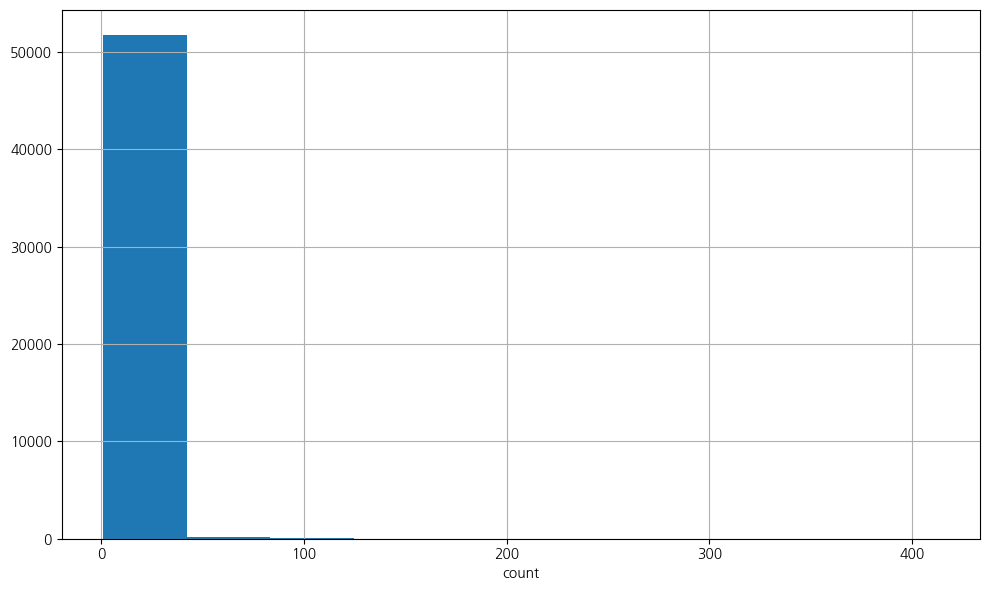

        user  count                                              movie
83         0     85  [10003, 10004, 10018, 10021, 10022, 10023, 100...
49961      1      1                                            [10107]
1183       2     15  [10001, 10030, 10038, 10049, 10055, 10056, 100...
71         3     92  [10005, 10006, 10007, 10014, 10015, 10018, 100...
130        4     71  [10015, 10017, 10019, 10021, 10026, 10027, 100...
...      ...    ...                                                ...
26249  52023      1                                            [10998]
26250  52024      1                                            [10998]
26251  52025      1                                            [10998]
26252  52026      1                                            [10998]
52027  52027      1                                            [10998]

[52028 rows x 3 columns]


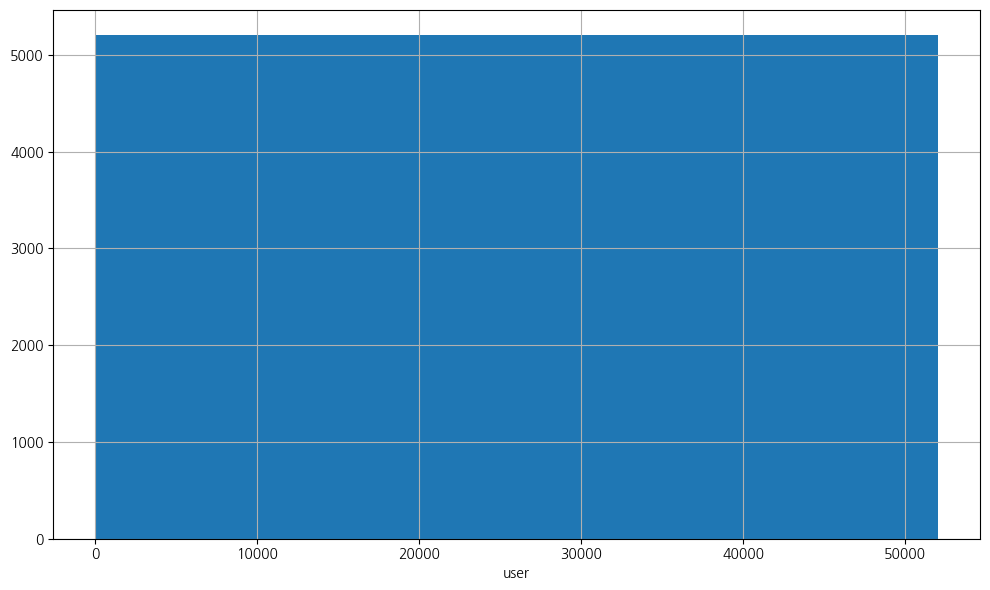

In [ ]:
file_path = './kmrd-small/rates.csv'
df = get_df_from(file_path)

while df is None:
    file_path = input("유효한 파일을 경로까지 입력해주세요: ")
    df = get_df_from(file_path)

df = df.dropna()
user_movies = df.groupby('user')['movie'].apply(list).reset_index()

user_counts = df['user'].value_counts().reset_index()
user_counts.columns = ['user', 'count']


user_df = pd.merge(user_counts, user_movies, on='user', how='left')

print(user_df)
get_chart_from(user_df, 'count', '', ChartShape.HISTOGRAM)
user_df = user_df.sort_values(by='user')
print(user_df)
get_chart_from(user_df, 'count', '', ChartShape.HISTOGRAM)


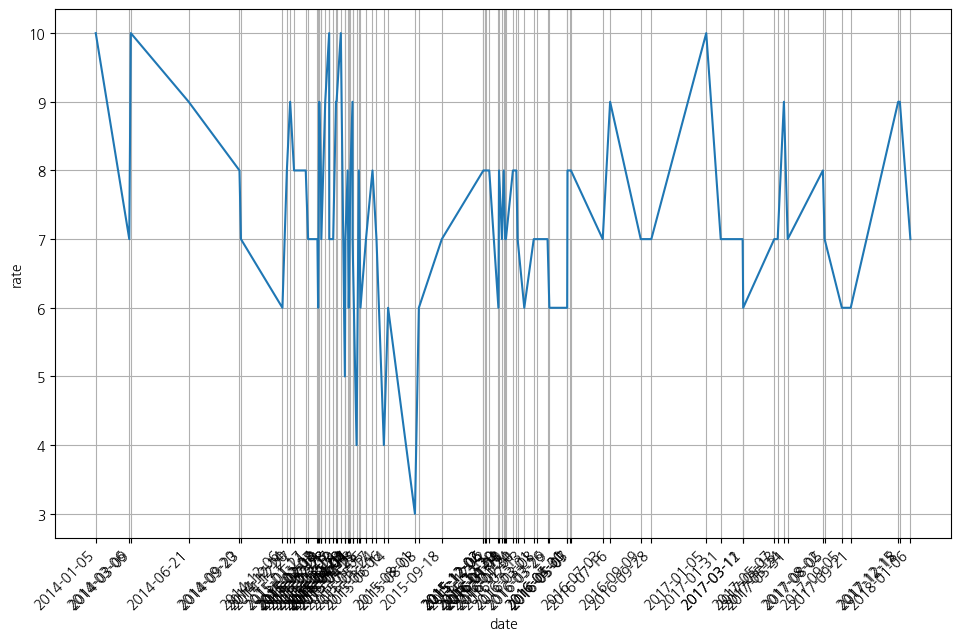

In [48]:
import datetime

def get_user_pattern_chart(id: int):
    filtered_user = df[df['user'] == id]
    if not filtered_user.empty :
        filtered_user = filtered_user.sort_values(by='date')
        get_chart_from(filtered_user, 'date', 'rate', shape=ChartShape.LINEAR, real_time=True)
    else:
        print("E: Invalid user ID!")

df['date'] = pd.to_datetime(df['time'], unit='s')
try:
    get_user_pattern_chart(int(input("검색할 유저의 ID를 입력하세요:")))
except:
    print(f"E: invalid integer")


[[0.22897105 0.17172384 0.74863403 0.86749443 0.72101859 0.1953344
  0.51096707 0.50489401 0.07039234 0.40268474 0.78153641 0.32240669]
 [0.13462817 0.8337822  0.2817035  0.26415504 0.15270119 0.29143706
  0.20929367 0.12834445 0.2592237  0.55580742 0.02177819 0.21567049]
 [0.47997171 0.73791139 0.4771553  0.783279   0.44738035 0.88707739
  0.90828427 0.82441428 0.11832582 0.90078547 0.17852869 0.23298865]
 [0.66045298 0.9433308  0.92017878 0.04763783 0.28165731 0.99329668
  0.93860745 0.17063373 0.23208305 0.2840212  0.61946106 0.70814784]
 [0.36700417 0.98930422 0.20249177 0.18124275 0.61303515 0.52633475
  0.52275624 0.05252208 0.15756224 0.00211488 0.84076585 0.25626871]
 [0.27625876 0.27496609 0.19280085 0.90534155 0.71825045 0.14239049
  0.92955653 0.7867249  0.75931551 0.57675499 0.65912747 0.17275249]
 [0.19619905 0.90842854 0.46618315 0.48114091 0.73849706 0.24252696
  0.5274604  0.08619175 0.8306527  0.45772159 0.21795861 0.73769749]
 [0.96727139 0.55380066 0.72994978 0.47328

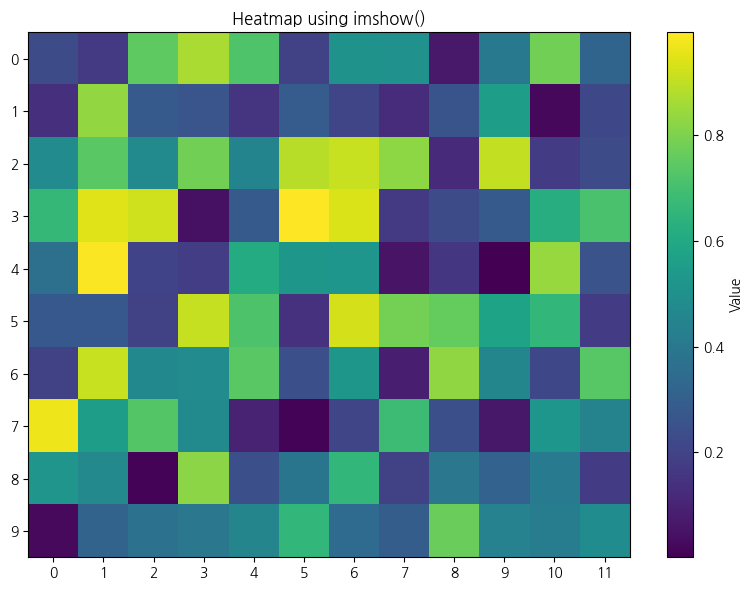

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 예제 데이터 생성 (2차원 배열)
data = np.random.rand(10, 12)  # 10x12 크기의 랜덤 데이터
print(data)

plt.figure(figsize=(8, 6))  # 그래프 크기 설정 (선택적)
plt.imshow(
    data, cmap="viridis", interpolation="nearest", aspect="auto"
)  # 히트맵 그리기

plt.colorbar(label="Value")  # 컬러바 추가
plt.title("Heatmap using imshow()")

plt.xticks(np.arange(data.shape[1]), np.arange(data.shape[1]))  # x축 눈금 설정
plt.yticks(np.arange(data.shape[0]), np.arange(data.shape[0]))  # y축 눈금 설정

plt.tight_layout()
plt.show()